In [1]:
import tensorflow as tf
from tensorflow import keras
import import_ipynb
from dataloader import get_LFW_X_df, get_y_df, data_prep
from model_arch import build_LFW_model
from hyperparameters import create_callback, EPOCHS, LEARNING_RATE, BATCH_SIZE
from predictions import generate_predictions, generate_csv
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

2024-01-06 19:17:21.951142: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-06 19:17:21.980590: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-06 19:17:21.981383: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-06 19:17:22.649659: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


importing Jupyter notebook from dataloader.ipynb
Tensorflow version: 2.12.0
importing Jupyter notebook from model_arch.ipynb
importing Jupyter notebook from hyperparameters.ipynb
Tensorflow version: 2.12.0
Tensorflow version: 2.12.0
importing Jupyter notebook from predictions.ipynb


In [2]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.12.0


In [3]:
data_filepath = "../../../data/csv/EXP1&2DATA.csv"
checkpoint_filepath = "../../../model_weights/regression/LFW"

In [4]:
callback = create_callback(
    checkpoint_filepath
)

In [5]:
df = pd.read_csv(data_filepath)
df['LFW_g'].mean()

74.8869465648855

In [6]:
df.tail()

,date,plant_id,tray_id,LFW_g,LDW_g,LA_mm2,manual_height_cm,area,perimeter,width,...,G_channel,B_channel,H_channel,S_channel,V_channel,height_cm_max,height_cm_mode,e_minoraxis,e_majoraxis,e_eccentricity
126,23/02/2023,46,3,57.96,3.01,726.46,13.0,18610.5,745.595015,194,...,65,25,31,168,65,11.6,8.9,138.552826,189.431244,0.681933
127,23/02/2023,48,3,81.46,3.88,1001.79,14.8,17956.5,648.884338,160,...,59,20,30,183,60,12.7,11.8,139.370636,176.852585,0.615597
128,23/02/2023,50,3,140.84,6.38,1707.14,16.9,23335.0,668.440687,183,...,59,22,30,175,60,14.3,13.2,163.992294,191.335068,0.515159
129,23/02/2023,52,3,108.17,5.25,1364.18,16.6,23258.5,656.482317,199,...,60,23,30,174,61,14.5,12.8,160.081513,194.861466,0.570188
130,23/02/2023,54,3,64.40,3.35,812.24,14.7,17731.0,721.210239,190,...,65,23,32,176,65,13.8,10.2,128.338684,192.531418,0.745428


In [7]:
X = get_LFW_X_df(data_filepath)
y = get_y_df(data_filepath, "LFW_g")
#X.tail()
X_train, X_test, y_train, y_test = data_prep(X, y)

In [8]:
model = build_LFW_model()
print('Input shape:', X_train[0].shape)

Input shape: (18,)


2024-01-06 19:17:23.946508: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-06 19:17:23.968493: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [10]:
history = model.fit (
    X_train, y_train,
    epochs = EPOCHS,
    validation_split = 0.2,
    callbacks = [callback]
)

Epoch 1/375


3/3 [==============================] - 1s 54ms/step - loss: 75.0692 - val_loss: 66.2583
Epoch 2/375
3/3 [==============================] - 0s 9ms/step - loss: 75.0116 - val_loss: 66.2349
Epoch 3/375
3/3 [==============================] - 0s 10ms/step - loss: 74.9768 - val_loss: 66.2106
Epoch 4/375
3/3 [==============================] - 0s 9ms/step - loss: 74.9451 - val_loss: 66.1902
Epoch 5/375
3/3 [==============================] - 0s 9ms/step - loss: 74.9129 - val_loss: 66.1688
Epoch 6/375
3/3 [==============================] - 0s 9ms/step - loss: 74.8801 - val_loss: 66.1474
Epoch 7/375
3/3 [==============================] - 0s 9ms/step - loss: 74.8465 - val_loss: 66.1276
Epoch 8/375
3/3 [==============================] - 0s 9ms/step - loss: 74.8119 - val_loss: 66.1046
Epoch 9/375
3/3 [==============================] - 0s 9ms/step - loss: 74.7760 - val_loss: 66.0786
Epoch 10/375
3/3 [==============================] - 0s 9ms/step - loss: 74.7388 - val_loss: 66.0517
Epoch 11/375
3/3 [=

In [11]:
model.save(checkpoint_filepath)

2024-01-06 19:17:32.916539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-01-06 19:17:32.924964: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-01-06 19:17:33.068712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-01-06 19:17:33

INFO:tensorflow:Assets written to: ../../../model_weights/regression/LFW/assets


INFO:tensorflow:Assets written to: ../../../model_weights/regression/LFW/assets


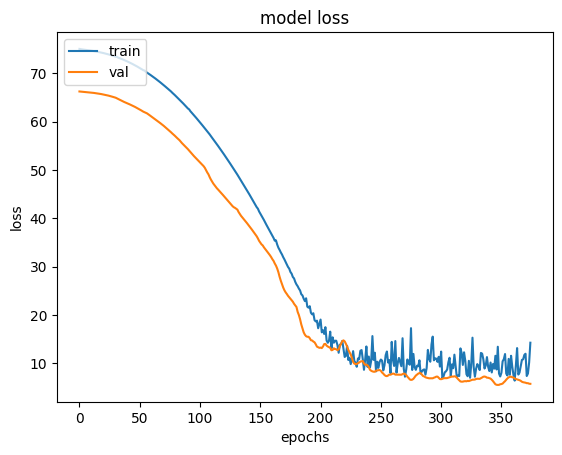

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 16ms/step - loss: 8.3259


8.325867652893066

In [14]:
figures_filepath = "../../../figures/LFW_error_csv"
generate_csv(model, X_test, y_test, "LFW_predictions", "LFW_actual", figures_filepath)

1/1 [==============================] - 0s 64ms/step
